Data Scientist Workshop - ex.6.1 - Adam Trentowski, 162602


In [53]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from matplotlib.colors import ListedColormap

Load the Dataset

In [54]:
dataset = pd.read_csv('D:/Projekty/DataScientistWorkshop/lab_06/files/VLagun_Phys_Years3.csv')

In [55]:
dataset.head()

,PSU,O2,temp.,SS,DOC,TPOC,Windspeedinsitu,Depth,Years
0,3.757624,9.46,18.3,52.0,7.500,8.5650,3.5,3.3,0
1,3.504707,9.89,19.1,50.0,7.860,8.5200,0.0,3.6,0
2,3.757624,9.66,18.1,59.0,8.172,8.4915,1.0,3.4,0
3,3.107266,10.36,19.5,46.0,7.848,8.8320,0.0,2.9,0
4,2.619498,11.56,19.0,42.0,7.536,9.2400,0.0,3.0,0


In [56]:
X = dataset.loc[:, ['temp.', 'Windspeedinsitu']].values
y = dataset.loc[:, 'Years'].values

Split dataset

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

Scaling

In [58]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# SVM Fitting, Predicting - RBF

In [59]:
classifier = SVC(kernel='rbf', random_state=0)
classifier.fit(X_train, y_train)

SVC(random_state=0)

In [60]:
y_pred = classifier.predict(X_test)
y_pred

array([0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1], dtype=int64)

In [61]:
y_pred = classifier.predict(X_train)
y_pred_test = classifier.predict(X_test)

In [62]:
cm = confusion_matrix(y_train, y_pred)
print(cm)
accuracy_score(y_train, y_pred)

[[35  7]
 [ 3 39]]


0.8809523809523809

In [63]:
cm = confusion_matrix(y_test, y_pred_test)
print(cm)
accuracy_score(y_test, y_pred_test)

[[19  3]
 [ 0 14]]


0.9166666666666666

C:\Users\Adam\AppData\Local\Temp\ipykernel_13824\1961349229.py:9: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c=ListedColormap(['red', 'green'])(i), label=j)


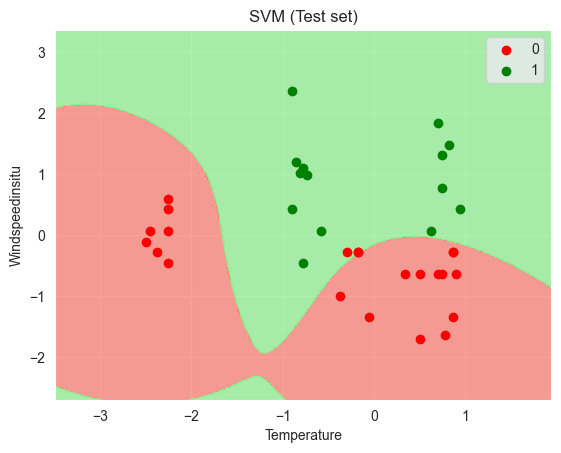

In [64]:
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01),
                     np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:, 1].max() + 1, step=0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape), alpha=0.75, cmap=ListedColormap(['salmon', 'lightgreen']))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c=ListedColormap(['red', 'green'])(i), label=j)
plt.title('SVM (Test set)')
plt.xlabel('Temperature')
plt.ylabel('Windspeedinsitu')
plt.legend()
plt.show()

# SVM Fitting, Predicting - Linear

In [65]:
classifier = SVC(kernel='linear', random_state=0)
classifier.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

In [66]:
y_pred = classifier.predict(X_test)
y_pred

array([0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1], dtype=int64)

In [67]:
y_pred = classifier.predict(X_train)
y_pred_test = classifier.predict(X_test)

In [68]:
cm = confusion_matrix(y_train, y_pred)
print(cm)
accuracy_score(y_train, y_pred)

[[34  8]
 [ 9 33]]


0.7976190476190477

In [69]:
cm = confusion_matrix(y_test, y_pred_test)
print(cm)
accuracy_score(y_test, y_pred_test)

[[20  2]
 [ 1 13]]


0.9166666666666666

C:\Users\Adam\AppData\Local\Temp\ipykernel_13824\1961349229.py:9: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c=ListedColormap(['red', 'green'])(i), label=j)


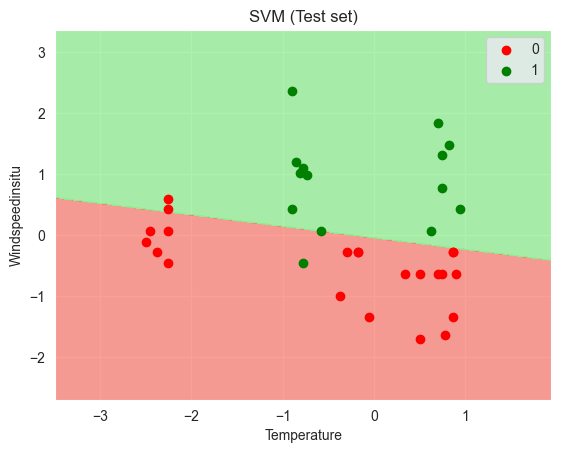

In [70]:
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01),
                     np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:, 1].max() + 1, step=0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape), alpha=0.75, cmap=ListedColormap(['salmon', 'lightgreen']))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c=ListedColormap(['red', 'green'])(i), label=j)
plt.title('SVM (Test set)')
plt.xlabel('Temperature')
plt.ylabel('Windspeedinsitu')
plt.legend()
plt.show()

# SVM Fitting, Predicting - Sigmoid

In [71]:
classifier = SVC(kernel='sigmoid', random_state=0)
classifier.fit(X_train, y_train)

SVC(kernel='sigmoid', random_state=0)

In [72]:
y_pred = classifier.predict(X_test)
y_pred

array([0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1], dtype=int64)

In [73]:
y_pred = classifier.predict(X_train)
y_pred_test = classifier.predict(X_test)

In [74]:
cm = confusion_matrix(y_train, y_pred)
print(cm)
accuracy_score(y_train, y_pred)

[[26 16]
 [13 29]]


0.6547619047619048

In [75]:
cm = confusion_matrix(y_test, y_pred_test)
print(cm)
accuracy_score(y_test, y_pred_test)

[[15  7]
 [ 3 11]]


0.7222222222222222

C:\Users\Adam\AppData\Local\Temp\ipykernel_13824\1961349229.py:9: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c=ListedColormap(['red', 'green'])(i), label=j)


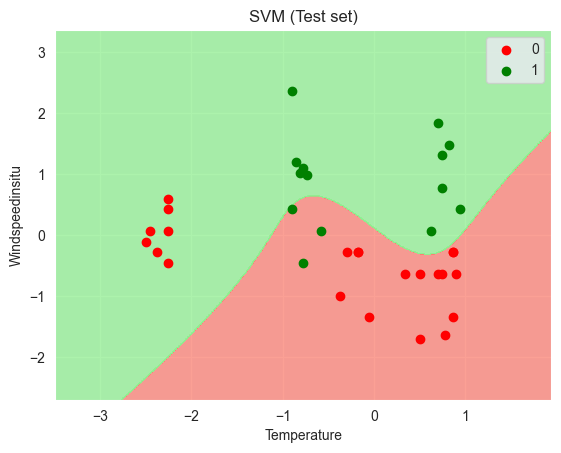

In [76]:
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01),
                     np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:, 1].max() + 1, step=0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape), alpha=0.75, cmap=ListedColormap(['salmon', 'lightgreen']))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c=ListedColormap(['red', 'green'])(i), label=j)
plt.title('SVM (Test set)')
plt.xlabel('Temperature')
plt.ylabel('Windspeedinsitu')
plt.legend()
plt.show()

# SVM Fitting, Predicting - Poly

In [77]:
classifier = SVC(kernel='poly', random_state=0)
classifier.fit(X_train, y_train)

SVC(kernel='poly', random_state=0)

In [78]:
y_pred = classifier.predict(X_test)
y_pred

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1], dtype=int64)

In [79]:
y_pred = classifier.predict(X_train)
y_pred_test = classifier.predict(X_test)

In [80]:
cm = confusion_matrix(y_train, y_pred)
print(cm)
accuracy_score(y_train, y_pred)

[[22 20]
 [ 0 42]]


0.7619047619047619

In [81]:
cm = confusion_matrix(y_test, y_pred_test)
print(cm)
accuracy_score(y_test, y_pred_test)

[[ 9 13]
 [ 0 14]]


0.6388888888888888

C:\Users\Adam\AppData\Local\Temp\ipykernel_13824\1961349229.py:9: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c=ListedColormap(['red', 'green'])(i), label=j)


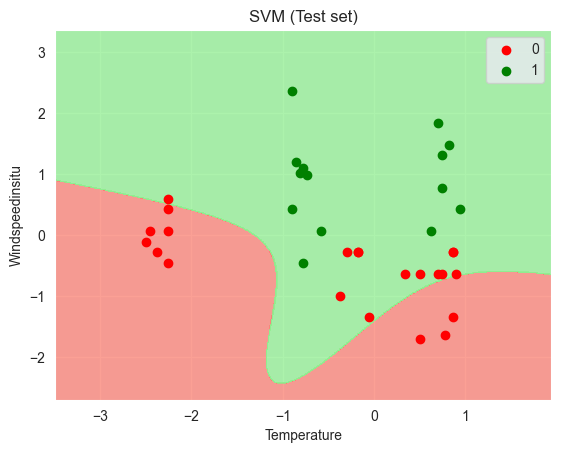

In [82]:
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01),
                     np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:, 1].max() + 1, step=0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape), alpha=0.75, cmap=ListedColormap(['salmon', 'lightgreen']))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c=ListedColormap(['red', 'green'])(i), label=j)
plt.title('SVM (Test set)')
plt.xlabel('Temperature')
plt.ylabel('Windspeedinsitu')
plt.legend()
plt.show()

### RBF
Train acc = 88%
Test acc = 92%

The model is overfitted.

### Linear
Train acc = 80%
Test acc = 92%

The model is overfitted.

### Sigmoid
Train acc = 65%
Test acc = 72%

The model is overfitted.

### Poly
Train acc = 76%
Test acc = 64%

The model is well-fitted.

The SVM model with a poly kernel is the one that is well-fitted and does not exhibit overfitting.